# 12.2 Exploring Data with Seaborn

### This assignment I am tasked with creating several different types for plots:
    1. Plot one variable four different ways
    2. Chose two continuous variables and plot them 3 different ways
    3. choose on continuous variable and one categorical variable and plot them six different ways


In [1]:
# Import the tools used
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
wine = pd.read_csv('winemag_data.csv', index_col=0)
wine.head(10)

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
5,Spain,Blackberry and raspberry aromas show a typical...,Ars In Vitro,87,15.0,Northern Spain,Navarra,NaN,Michael Schachner,@wineschach,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem
6,Italy,"Here's a bright, informal red that opens with ...",Belsito,87,16.0,Sicily & Sardinia,Vittoria,NaN,Kerin O’Keefe,@kerinokeefe,Terre di Giurfo 2013 Belsito Frappato (Vittoria),Frappato,Terre di Giurfo
7,France,This dry and restrained wine offers spice in p...,NaN,87,24.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Trimbach 2012 Gewurztraminer (Alsace),Gewürztraminer,Trimbach
8,Germany,Savory dried thyme notes accent sunnier flavor...,Shine,87,12.0,Rheinhessen,NaN,NaN,Anna Lee C. Iijima,NaN,Heinz Eifel 2013 Shine Gewürztraminer (Rheinhe...,Gewürztraminer,Heinz Eifel
9,France,This has great depth of flavor with its fresh ...,Les Natures,87,27.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Jean-Baptiste Adam 2012 Les Natures Pinot Gris...,Pinot Gris,Jean-Baptiste Adam


In [3]:
# Strip all whitespace in dataframe
wine = wine.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

# Format all strings to capitalize
wine = wine.apply(lambda x: x.str.capitalize() if x.dtype == "object" else x)

# Drop Twitter Handle column and unamed
wine.drop('taster_twitter_handle', axis=1, inplace=True)

In [4]:
wine.isna().sum()

country           63
description        0
designation    37465
points             0
price           8996
province          63
region_1       21247
region_2       79460
taster_name    26244
title              0
variety            1
winery             0
dtype: int64

In [5]:
# Remove region_2 as half the data is missing
# Remove wines with missing price
# Remove missing province and country
wine.drop('region_2', axis=1, inplace=True)
wine = wine.dropna(subset=['price','province', 'country'])
wine.isna().sum()

country            0
description        0
designation    34768
points             0
price              0
province           0
region_1       19516
taster_name    24496
title              0
variety            1
winery             0
dtype: int64

In [6]:
wine.dtypes
# All columns are the correct datatype

country         object
description     object
designation     object
points           int64
price          float64
province        object
region_1        object
taster_name     object
title           object
variety         object
winery          object
dtype: object

## 1. Plot Points
For the first set of charts I decided to see the different ways you can plot the count of a categorical variable. 

In [7]:
province = wine.groupby(['province'])['points'].mean().reset_index()
province.head(5)

,province,points
0,Achaia,85.800000
1,Aconcagua costa,87.629630
2,Aconcagua valley,88.192982
3,Aegean,88.954545
4,Agioritikos,86.333333


The stadrad histogram tells us a lot about the data of just a single variable. It tells us the frequency in each point as well as the type of distribution that the data has. 

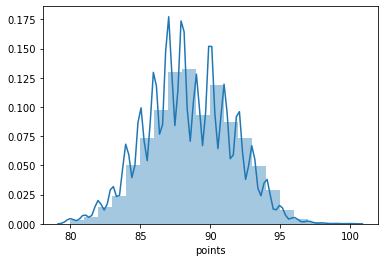

In [8]:
sns.distplot(wine['points'], bins=20)
plt.show()

The stripplot was a complete failure. It tells us nothing significant about the data. m

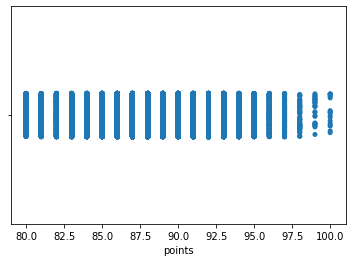

In [9]:
sns.stripplot(wine['points'], jitter=True)
plt.show()

The box plot tells us that the mean of the wine points is arounf 88 points. Additionally 50% of the points range from 86 to 91. With outliers above 98 points. Overall this plot is very useful to summarize the statistics of the variable. 

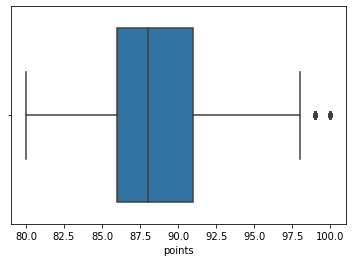

In [10]:
sns.boxplot(wine['points'])
plt.show()

Similar to the histogram the bar chart below tells us the frequency of the variable. 

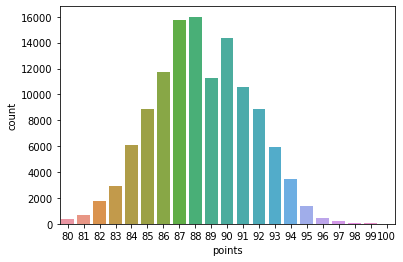

In [11]:
sns.countplot(wine['points'])
plt.show()

## Plot Score and Points

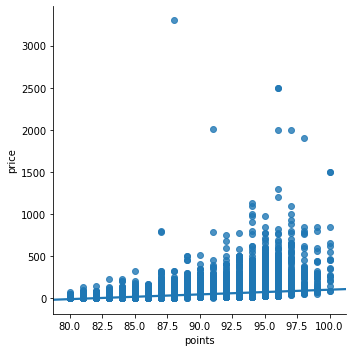

In [12]:
sns.lmplot(x='points', y='price', data=wine)
plt.show()

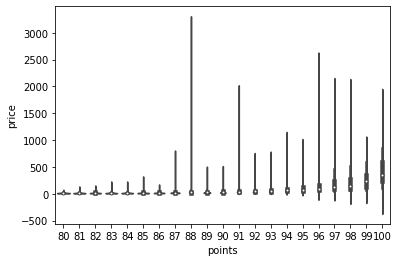

In [13]:
sns.violinplot(x='points', y='price', data=wine)
plt.show()

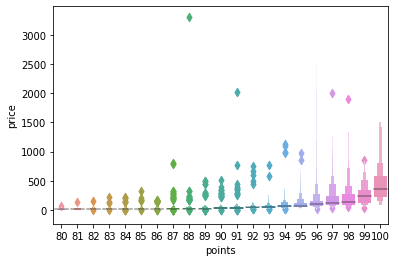

In [14]:
sns.boxenplot(x='points', y='price', data=wine)
plt.show()

## Points, Price, and Province

In [ ]:
sns.lmplot(x='points', y='price', hue='province' data=wine)
plt.show()